Task 5: Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 


In [2]:
np.random.seed(0)
n_samples = 1000

In [65]:
road_conditions = np.random.choice(['Dry', 'Wet', 'Icy'], size=n_samples)


In [4]:
weather_conditions = np.random.choice(['Clear', 'Rainy', 'Snowy'], size=n_samples)

In [5]:
time_of_day = np.random.randint(0,24, size=n_samples)

In [6]:
latitude = np.random.uniform(40,41, size=n_samples)
longitude = np.random.uniform(-74, -73, size=n_samples)

In [7]:
severity = np.random.randint(1,6, size=n_samples)

In [8]:
data = pd.DataFrame({
    'road_conditons' : road_conditions,
    'weather_conditions' : weather_conditions, 
    'time_of_day' : time_of_day,
    'latitude' : latitude, 
    'longitude' : longitude, 
    'severity' : severity
})

In [71]:
print(data.columns)

Index(['road_conditons', 'weather_conditions', 'time_of_day', 'latitude',
       'longitude', 'severity', 'Cluster', 'cluster'],
      dtype='object')


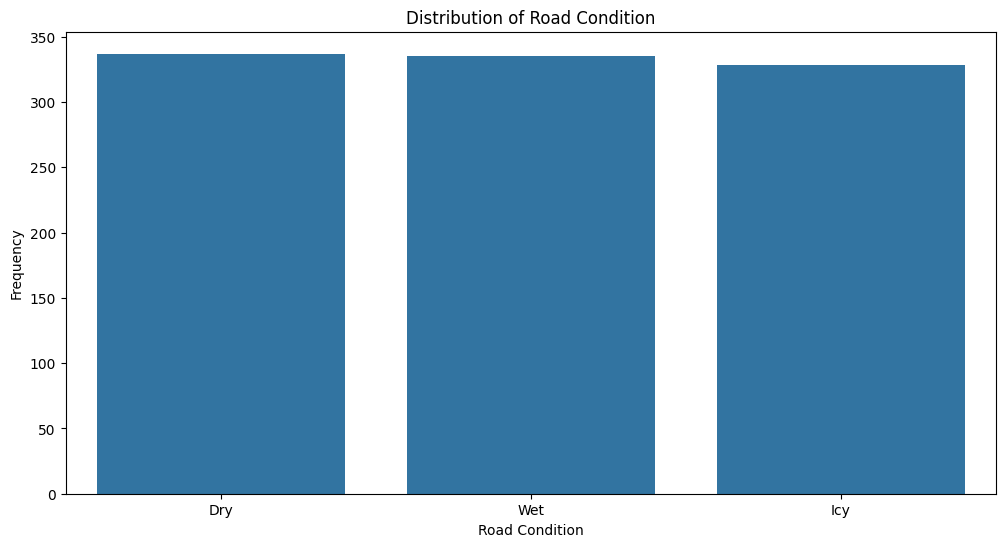

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(x='road_conditons', data=data)
plt.title('Distribution of Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Frequency')
plt.show()

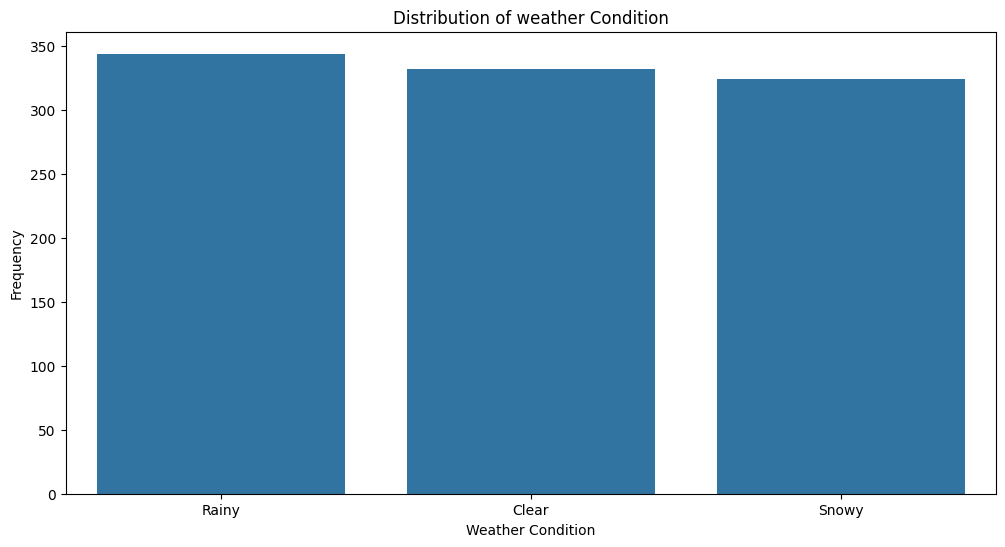

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='weather_conditions', data=data)
plt.title('Distribution of weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.show()

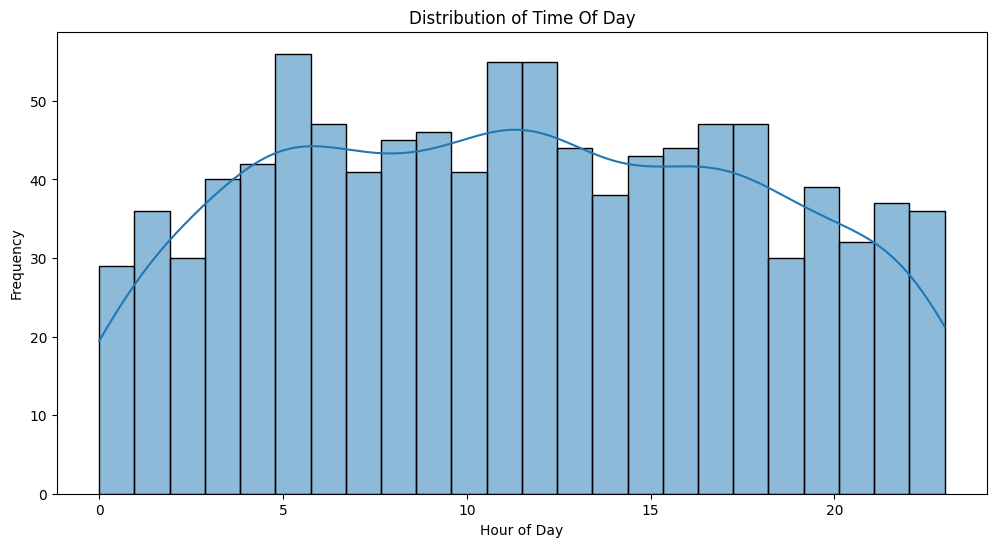

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(data['time_of_day'], bins=24, kde=True)
plt.title('Distribution of Time Of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

In [26]:
x = data[['latitude','longitude']]
KMeans = KMeans(n_clusters=5, random_state=0).fit(x)
data['Cluster'] = KMeans.labels_

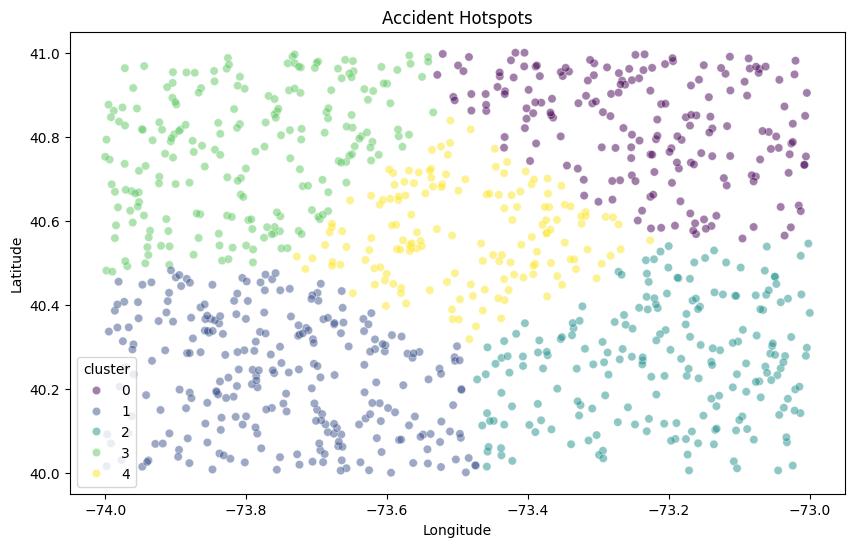

In [31]:
#Ensure 'cluster' columns exists 
if 'cluster' not in data.columns: 
    data['cluster'] = KMeans.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster',data=data, palette='viridis',alpha=0.5)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

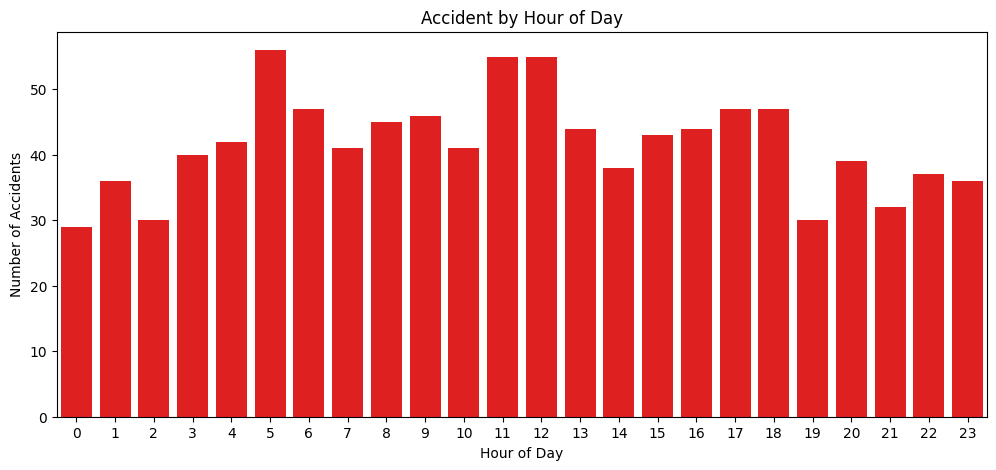

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x='time_of_day', data=data,color='red')
plt.title('Accident by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

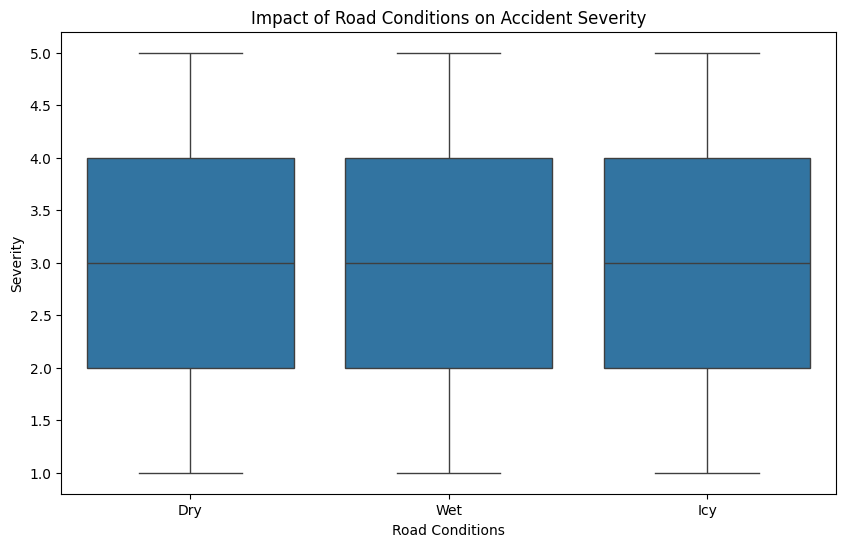

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(x='road_conditons', y='severity',data=data)
plt.title('Impact of Road Conditions on Accident Severity')
plt.xlabel('Road Conditions')
plt.ylabel('Severity')
plt.show()